<a href="https://colab.research.google.com/github/JUMITO737/Regresi-n_Lineal/blob/main/Act_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 4 (Regresión Lineal Simple)

## Juan Carlos Ramirez Espinosa A01706986



1. Crear un nuevo repositorio con el nombre: Regresión Lineal

2. Agregar el archivo: DF_México.csv

3. Realiza las acciones de preprocesamiento necesarias: Nulos y Outliers

4. Analizar la correlación que existe en cada tipo de habitación (Elegir 2 tipos) respecto a las variables siguientes en el siguiente orden “(dependiente, independiente)”, utilizando Python y Google Colab, obtener los datos y gráficos requeridos en cada caso.

 - “host_acceptance_rate vs host_response_rate”

 - “review_scores_location vs review_scores_cleanliness”

 - “host_acceptance_rate vs price”

 - “availability_365 vs number_of_reviews”

 - “host_acceptance_rate vs number_of_reviews ”

 - “reviews_per_month vs review_scores_communication”

5. Crear el modelo matemático que describa de mejor manera el número de reseñas para cada tipo de alojamiento elegido, utilizando la variable con mayor correlación.

6. Realizar una tabla de todos los coeficientes de determinación y correlación obtenidos para cada tipo de habitación elegido.

7. Crear los archivos requeridos en Google Colab y respaldarlos en GitHub.

8. Subir el link del repositorio en CANVAS para “Evaluación”

## Librerias :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from turtle import color


## Archivo :

In [2]:
df = pd.read_csv('DF_Mexico.csv')
df.sample(10)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7995,39296422,https://www.airbnb.com/rooms/39296422,20230329041210,2023-03-30,city scrape,Comodisima y ubicadisima Suite,"Departamento tipo suite hotelero, todo nuevo, ...","Recomendamos ampliamente pizzeria Chester, var...",https://a0.muscache.com/pictures/fe638bad-251e...,301692620,...,4.93,4.97,4.86,NaN,t,1,1,0,0,2.10
11936,49062163,https://www.airbnb.com/rooms/49062163,20230329041210,2023-03-30,city scrape,Bd grande en Coyoacán con baño,Disfrutaras la belleza de alojarte en una colo...,El vecindario es súper bonito y tranquilo si c...,https://a0.muscache.com/pictures/1a202072-8d5a...,153826740,...,4.73,4.64,4.55,NaN,f,2,0,2,0,0.46
15713,569413836263357860,https://www.airbnb.com/rooms/569413836263357860,20230329041210,2023-03-29,city scrape,Acogedor departamento en buena zona de Iztapalapa,"Departamento de dos habitaciones, muy luminoso...",NaN,https://a0.muscache.com/pictures/b043ab42-6ea3...,302989832,...,4.82,4.82,4.91,NaN,f,2,2,0,0,0.87
19321,719700939756449321,https://www.airbnb.com/rooms/719700939756449321,20230329041210,2023-03-30,previous scrape,Cómoda habitación cerca hospitales,Disfruta de la sencillez de este alojamiento t...,El lugar se encuentra en una zona segura con v...,https://a0.muscache.com/pictures/2c52635f-7f6d...,433876025,...,5.00,4.86,4.86,NaN,f,1,0,1,0,1.47
3308,21827617,https://www.airbnb.com/rooms/21827617,20230329041210,2023-03-30,city scrape,SUITES CORPORATIVAS ANDES 220-1,"DEPARTAMENTO TOTALMENTE AMUEBLADO Y EQUIPADO, ...",ANDES 220-1 SE CARACTERIZA POR ESTAR EN UNA ZO...,https://a0.muscache.com/pictures/4eebe3c8-23e3...,122054854,...,4.56,4.89,4.89,NaN,f,7,5,2,0,0.14
20675,760890805242161934,https://www.airbnb.com/rooms/760890805242161934,20230329041210,2023-03-29,city scrape,"Departamento con jardín, excelente ubicación",Enjoy this small apartment located in one of M...,One of the most popular neighbourhoods in Mexi...,https://a0.muscache.com/pictures/miso/Hosting-...,158059888,...,5.00,5.00,4.89,NaN,f,1,1,0,0,2.09
1482,14710924,https://www.airbnb.com/rooms/14710924,20230329041210,2023-03-30,city scrape,Room 5 House of Light and Color in Coyoacan.,This sunny and fresh room is located on the s...,NaN,https://a0.muscache.com/pictures/38b0554b-0aa1...,25416724,...,4.97,4.94,4.91,NaN,f,6,0,6,0,0.43
8800,41485286,https://www.airbnb.com/rooms/41485286,20230329041210,2023-03-29,city scrape,Puerta Jardín Home* apt fully equipped,Disfruta de una estancia como en casa. <br />...,A 20 minutos de aeropuerto y 10 minutos de POL...,https://a0.muscache.com/pictures/aa218c3d-9a68...,47465593,...,4.93,4.75,4.80,NaN,f,2,2,0,0,2.37
13644,52243700,https://www.airbnb.com/rooms/52243700,20230329041210,2023-03-29,city scrape,"Depto. 4 Piso, Estilo Minimalista Amueblado.",Disfruta en este espacio tranquilo y elegante ...,Es el pueblo de Santa Ursula Coapa en el cual ...,https://a0.muscache.com/pictures/47aeaa27-79a1...,422901353,...,4.62,4.28,4.72,NaN,t,1,1,0,0,3.30
9887,44231300,https://www.airbnb.com/rooms/44231300,20230329041210,2023-03-30,city scrape,Suite privada Maskarita pa,La habitación se encuentra dentro de Casa Kakt...,La Colonia Roma se caracteriza por su iniguala...,https://a0.muscache.com/pictures/miso/Hosting-...,241327887,...,4.88,4.93,4.72,NaN,t,22,8,14,0,6.68


# Limpieza :

## acciones de preprocesamiento necesarias: Nulos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [4]:
df.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3596
Length: 75, dtype: int64

### **----------------------- Bfill ------------------------------------**

In [5]:
df1 =df.fillna(method="bfill")
df1

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/28353712/4379...,10531228,...,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
1,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,...,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
2,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,...,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31
3,35797,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,4.78,4.98,4.48,NaN,f,1,1,0,0,0.46
4,44616,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.48,NaN,f,12,3,2,0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,853923589855678923,https://www.airbnb.com/rooms/853923589855678923,20230329041210,2023-03-30,city scrape,Rincón Mexico lindo!,Este lugar tiene una ubicación estratégica: ll...,Una zona muy bonita ya que varias de las atrac...,https://a0.muscache.com/pictures/miso/Hosting-...,488030249,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
24220,853966732274073000,https://www.airbnb.com/rooms/853966732274073000,20230329041210,2023-03-29,city scrape,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",Una zona muy bonita ya que varias de las atrac...,https://a0.muscache.com/pictures/miso/Hosting-...,506816029,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
24221,854225071295768399,https://www.airbnb.com/rooms/854225071295768399,20230329041210,2023-03-29,city scrape,Habitación privada en magnífica casa,Relájate en este espacio muy tranquilo y elega...,Una zona muy bonita ya que varias de las atrac...,https://a0.muscache.com/pictures/db71951a-8696...,154670560,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
24222,854247693069190865,https://www.airbnb.com/rooms/854247693069190865,20230329041210,2023-03-30,city scrape,Espacioso y luminoso loft - Roma,What else does it come with?<br />- WIFI 100MB...,Una zona muy bonita ya que varias de las atrac...,https://a0.muscache.com/pictures/miso/Hosting-...,7799414,...,NaN,NaN,NaN,NaN,t,13,13,0,0,NaN


In [6]:
df1.isnull().sum()

id                                               0
listing_url                                      0
scrape_id                                        0
last_scraped                                     0
source                                           0
                                                ..
calculated_host_listings_count                   0
calculated_host_listings_count_entire_homes      0
calculated_host_listings_count_private_rooms     0
calculated_host_listings_count_shared_rooms      0
reviews_per_month                               35
Length: 75, dtype: int64

### **----------------------- ffill ------------------------------------**

In [7]:
df2 = df1.fillna(method="ffill")
df2

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/28353712/4379...,10531228,...,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
1,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,...,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
2,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,...,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31
3,35797,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,4.78,4.98,4.48,NaN,f,1,1,0,0,0.46
4,44616,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.48,NaN,f,12,3,2,0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,853923589855678923,https://www.airbnb.com/rooms/853923589855678923,20230329041210,2023-03-30,city scrape,Rincón Mexico lindo!,Este lugar tiene una ubicación estratégica: ll...,Una zona muy bonita ya que varias de las atrac...,https://a0.muscache.com/pictures/miso/Hosting-...,488030249,...,5.00,5.00,5.00,NaN,f,2,2,0,0,1.00
24220,853966732274073000,https://www.airbnb.com/rooms/853966732274073000,20230329041210,2023-03-29,city scrape,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",Una zona muy bonita ya que varias de las atrac...,https://a0.muscache.com/pictures/miso/Hosting-...,506816029,...,5.00,5.00,5.00,NaN,t,1,1,0,0,1.00
24221,854225071295768399,https://www.airbnb.com/rooms/854225071295768399,20230329041210,2023-03-29,city scrape,Habitación privada en magnífica casa,Relájate en este espacio muy tranquilo y elega...,Una zona muy bonita ya que varias de las atrac...,https://a0.muscache.com/pictures/db71951a-8696...,154670560,...,5.00,5.00,5.00,NaN,f,1,0,1,0,1.00
24222,854247693069190865,https://www.airbnb.com/rooms/854247693069190865,20230329041210,2023-03-30,city scrape,Espacioso y luminoso loft - Roma,What else does it come with?<br />- WIFI 100MB...,Una zona muy bonita ya que varias de las atrac...,https://a0.muscache.com/pictures/miso/Hosting-...,7799414,...,5.00,5.00,5.00,NaN,t,13,13,0,0,1.00


In [8]:
df2.isnull().sum()

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 75, dtype: int64

In [9]:
df2['host_response_rate'].describe()

count     24224
unique       61
top        100%
freq      18531
Name: host_response_rate, dtype: object

In [10]:
df2['host_acceptance_rate'].describe()

count     24224
unique       90
top        100%
freq      12674
Name: host_acceptance_rate, dtype: object

## Filtrado por tipo de cuarto "room_type"
## room_type = "Entire home/apt"



In [11]:
df3 = df2[df2['room_type'] == 'Entire home/apt']
df3

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/28353712/4379...,10531228,...,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
1,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,...,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
2,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,...,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31
3,35797,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,4.78,4.98,4.48,NaN,f,1,1,0,0,0.46
4,44616,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.48,NaN,f,12,3,2,0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24217,853790308958785669,https://www.airbnb.com/rooms/853790308958785669,20230329041210,2023-03-29,city scrape,Cozy Loft,Cossy loft en una ubicación estratégica,En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,29239005,...,5.00,5.00,5.00,NaN,t,3,3,0,0,1.00
24219,853923589855678923,https://www.airbnb.com/rooms/853923589855678923,20230329041210,2023-03-30,city scrape,Rincón Mexico lindo!,Este lugar tiene una ubicación estratégica: ll...,Una zona muy bonita ya que varias de las atrac...,https://a0.muscache.com/pictures/miso/Hosting-...,488030249,...,5.00,5.00,5.00,NaN,f,2,2,0,0,1.00
24220,853966732274073000,https://www.airbnb.com/rooms/853966732274073000,20230329041210,2023-03-29,city scrape,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",Una zona muy bonita ya que varias de las atrac...,https://a0.muscache.com/pictures/miso/Hosting-...,506816029,...,5.00,5.00,5.00,NaN,t,1,1,0,0,1.00
24222,854247693069190865,https://www.airbnb.com/rooms/854247693069190865,20230329041210,2023-03-30,city scrape,Espacioso y luminoso loft - Roma,What else does it come with?<br />- WIFI 100MB...,Una zona muy bonita ya que varias de las atrac...,https://a0.muscache.com/pictures/miso/Hosting-...,7799414,...,5.00,5.00,5.00,NaN,t,13,13,0,0,1.00


### acciones de preprocesamiento necesarias: Outliers

In [12]:
columnas_eliminadas = ['id', 'scrape_id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'neighbourhood_group_cleansed', 'bathrooms', 'license', 'calendar_updated']

columnas_numericas = df3.select_dtypes(include=np.number).columns.difference(columnas_eliminadas)

columnas_mantener = ['host_response_rate', 'price', 'host_acceptance_rate']

df4 = df3[columnas_mantener + list(columnas_numericas)]

df4

,host_response_rate,price,host_acceptance_rate,accommodates,availability_30,availability_365,availability_60,availability_90,bedrooms,beds,...,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month
0,100%,"$1,434.00",90%,3,0,324,19,49,1.0,1.0,...,0,0,4.71,5.00,4.95,4.95,5.00,4.95,4.86,0.19
1,100%,$830.00,90%,2,11,346,41,71,1.0,1.0,...,0,1,4.90,4.93,4.88,5.00,4.95,4.85,4.84,0.54
2,100%,"$1,469.00",90%,6,0,87,0,0,3.0,3.0,...,0,2,4.82,4.92,4.71,4.92,4.58,4.57,4.71,0.31
3,100%,"$3,658.00",86%,2,28,363,58,88,1.0,1.0,...,0,0,4.56,4.87,4.70,4.78,4.98,4.58,4.48,0.46
4,100%,"$18,000.00",86%,14,30,357,59,89,5.0,8.0,...,1,12,4.56,4.87,4.70,4.78,4.98,4.58,4.48,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24217,100%,$980.00,100%,2,7,342,37,67,1.0,1.0,...,0,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
24219,100%,$760.00,100%,2,17,352,47,77,1.0,1.0,...,0,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
24220,100%,"$1,520.00",96%,7,30,365,60,90,2.0,3.0,...,0,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
24222,100%,"$1,200.00",100%,2,9,344,39,69,1.0,1.0,...,0,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00


In [13]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15602 entries, 0 to 24223
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            15602 non-null  object 
 1   price                                         15602 non-null  object 
 2   host_acceptance_rate                          15602 non-null  object 
 3   accommodates                                  15602 non-null  int64  
 4   availability_30                               15602 non-null  int64  
 5   availability_365                              15602 non-null  int64  
 6   availability_60                               15602 non-null  int64  
 7   availability_90                               15602 non-null  int64  
 8   bedrooms                                      15602 non-null  float64
 9   beds                                          15602 non-null 

In [14]:
df4['host_response_rate'] = df4['host_response_rate'].str.rstrip('%').astype(float)

df4['price'] = df4['price'].str.replace('$', '').str.replace(',', '').astype(float)

df4['host_acceptance_rate'] = df4['host_acceptance_rate'].str.rstrip('%').astype(float)

<ipython-input-14-113a22add9b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['host_response_rate'] = df4['host_response_rate'].str.rstrip('%').astype(float)
<ipython-input-14-113a22add9b8>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df4['price'] = df4['price'].str.replace('$', '').str.replace(',', '').astype(float)
<ipython-input-14-113a22add9b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [15]:
promedio_columnas = df4.mean()

df4 = df4.fillna(promedio_columnas)

y = df4

Limite_Superior= y.mean() + 3*y.std()

Limite_Inferior= y.mean() - 3*y.std()

print("Limite superior", Limite_Superior)

print("Limite inferior", Limite_Inferior)

Limite superior host_response_rate                                139.503410
price                                           46040.610393
host_acceptance_rate                              146.541964
accommodates                                       10.727797
availability_30                                    46.889509
availability_365                                  610.287502
availability_60                                    97.494537
availability_90                                   147.899447
bedrooms                                            4.912509
beds                                                7.047833
calculated_host_listings_count                    129.815510
calculated_host_listings_count_entire_homes       124.645998
calculated_host_listings_count_private_rooms       10.420125
calculated_host_listings_count_shared_rooms         0.489684
latitude                                           19.525314
longitude                                         -99.071893
maximum_

In [16]:
df5= df4[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df5

,host_response_rate,price,host_acceptance_rate,accommodates,availability_30,availability_365,availability_60,availability_90,bedrooms,beds,...,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month
0,100.0,1434.0,90.0,3.0,0,324,19,49,1.0,1.0,...,0.0,0.0,4.71,5.00,4.95,4.95,5.00,4.95,4.86,0.19
1,100.0,830.0,90.0,2.0,11,346,41,71,1.0,1.0,...,0.0,1.0,4.90,4.93,4.88,5.00,4.95,4.85,4.84,0.54
2,100.0,1469.0,90.0,6.0,0,87,0,0,3.0,3.0,...,0.0,2.0,4.82,4.92,4.71,4.92,4.58,4.57,4.71,0.31
3,100.0,3658.0,86.0,2.0,28,363,58,88,1.0,1.0,...,0.0,0.0,4.56,4.87,4.70,4.78,4.98,4.58,4.48,0.46
4,100.0,18000.0,86.0,NaN,30,357,59,89,NaN,NaN,...,1.0,12.0,4.56,4.87,4.70,4.78,4.98,4.58,4.48,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24217,100.0,980.0,100.0,2.0,7,342,37,67,1.0,1.0,...,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
24219,100.0,760.0,100.0,2.0,17,352,47,77,1.0,1.0,...,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
24220,100.0,1520.0,96.0,7.0,30,365,60,90,2.0,3.0,...,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
24222,100.0,1200.0,100.0,2.0,9,344,39,69,1.0,1.0,...,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00


In [17]:
df5.isnull().sum()

host_response_rate                              415
price                                            24
host_acceptance_rate                            477
accommodates                                    304
availability_30                                   0
availability_365                                  0
availability_60                                   0
availability_90                                   0
bedrooms                                        243
beds                                            192
calculated_host_listings_count                  256
calculated_host_listings_count_entire_homes     256
calculated_host_listings_count_private_rooms    304
calculated_host_listings_count_shared_rooms      51
latitude                                        297
longitude                                       470
maximum_maximum_nights                            5
maximum_minimum_nights                          130
maximum_nights                                    0
maximum_nigh

In [18]:
df6 = df5.copy()

df6 = df6.fillna(round(df4.mean(),1))

df6

,host_response_rate,price,host_acceptance_rate,accommodates,availability_30,availability_365,availability_60,availability_90,bedrooms,beds,...,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month
0,100.0,1434.0,90.0,3.0,0,324,19,49,1.0,1.0,...,0.0,0.0,4.71,5.00,4.95,4.95,5.00,4.95,4.86,0.19
1,100.0,830.0,90.0,2.0,11,346,41,71,1.0,1.0,...,0.0,1.0,4.90,4.93,4.88,5.00,4.95,4.85,4.84,0.54
2,100.0,1469.0,90.0,6.0,0,87,0,0,3.0,3.0,...,0.0,2.0,4.82,4.92,4.71,4.92,4.58,4.57,4.71,0.31
3,100.0,3658.0,86.0,2.0,28,363,58,88,1.0,1.0,...,0.0,0.0,4.56,4.87,4.70,4.78,4.98,4.58,4.48,0.46
4,100.0,18000.0,86.0,4.0,30,357,59,89,1.8,2.3,...,1.0,12.0,4.56,4.87,4.70,4.78,4.98,4.58,4.48,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24217,100.0,980.0,100.0,2.0,7,342,37,67,1.0,1.0,...,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
24219,100.0,760.0,100.0,2.0,17,352,47,77,1.0,1.0,...,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
24220,100.0,1520.0,96.0,7.0,30,365,60,90,2.0,3.0,...,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
24222,100.0,1200.0,100.0,2.0,9,344,39,69,1.0,1.0,...,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00


In [19]:
df6.isnull().sum()

host_response_rate                              0
price                                           0
host_acceptance_rate                            0
accommodates                                    0
availability_30                                 0
availability_365                                0
availability_60                                 0
availability_90                                 0
bedrooms                                        0
beds                                            0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
latitude                                        0
longitude                                       0
maximum_maximum_nights                          0
maximum_minimum_nights                          0
maximum_nights                                  0
maximum_nights_avg_ntm                          0


In [20]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15602 entries, 0 to 24223
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            15187 non-null  float64
 1   price                                         15578 non-null  float64
 2   host_acceptance_rate                          15125 non-null  float64
 3   accommodates                                  15298 non-null  float64
 4   availability_30                               15602 non-null  int64  
 5   availability_365                              15602 non-null  int64  
 6   availability_60                               15602 non-null  int64  
 7   availability_90                               15602 non-null  int64  
 8   bedrooms                                      15359 non-null  float64
 9   beds                                          15410 non-null 

### Analizar la correlación que existe en cada tipo de habitación (Elegir 2 tipos) respecto a las variables siguientes en el siguiente orden “(dependiente, independiente)”, utilizando Python y Google Colab, obtener los datos y gráficos requeridos en cada caso.

In [21]:
df7 = df6.copy()
df7

,host_response_rate,price,host_acceptance_rate,accommodates,availability_30,availability_365,availability_60,availability_90,bedrooms,beds,...,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month
0,100.0,1434.0,90.0,3.0,0,324,19,49,1.0,1.0,...,0.0,0.0,4.71,5.00,4.95,4.95,5.00,4.95,4.86,0.19
1,100.0,830.0,90.0,2.0,11,346,41,71,1.0,1.0,...,0.0,1.0,4.90,4.93,4.88,5.00,4.95,4.85,4.84,0.54
2,100.0,1469.0,90.0,6.0,0,87,0,0,3.0,3.0,...,0.0,2.0,4.82,4.92,4.71,4.92,4.58,4.57,4.71,0.31
3,100.0,3658.0,86.0,2.0,28,363,58,88,1.0,1.0,...,0.0,0.0,4.56,4.87,4.70,4.78,4.98,4.58,4.48,0.46
4,100.0,18000.0,86.0,4.0,30,357,59,89,1.8,2.3,...,1.0,12.0,4.56,4.87,4.70,4.78,4.98,4.58,4.48,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24217,100.0,980.0,100.0,2.0,7,342,37,67,1.0,1.0,...,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
24219,100.0,760.0,100.0,2.0,17,352,47,77,1.0,1.0,...,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
24220,100.0,1520.0,96.0,7.0,30,365,60,90,2.0,3.0,...,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
24222,100.0,1200.0,100.0,2.0,9,344,39,69,1.0,1.0,...,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

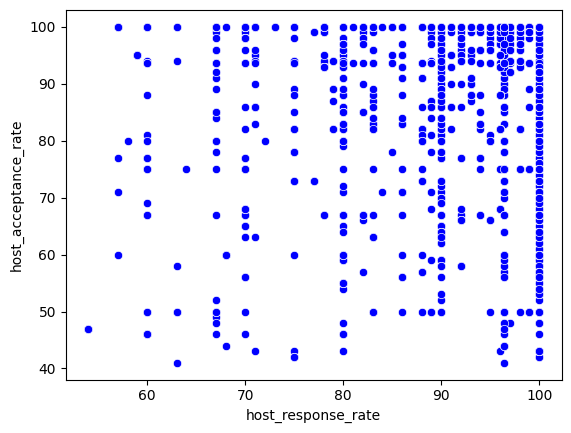

In [22]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=df6)

In [23]:
Vars_Indep= df6[['host_acceptance_rate']]
Var_Dep= df6['host_response_rate']

model= LinearRegression()

model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.1664171]),
 'rank_': 1,
 'singular_': array([1091.89535515]),
 'intercept_': 82.46076181336484}

#### Modelo :
y = 0.1664171 * x = 82.46076181336484

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

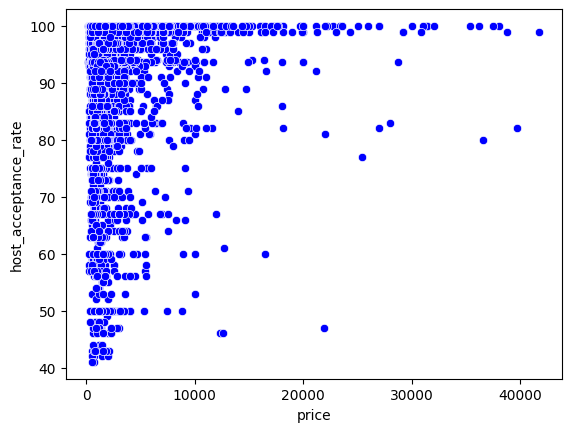

In [24]:
sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=df6)

In [25]:
Vars_Indep= df6[['host_acceptance_rate']]
Var_Dep= df6['price']

model2 = LinearRegression()

model2.fit(X=Vars_Indep, y=Var_Dep)

model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.43320976]),
 'rank_': 1,
 'singular_': array([1091.89535515]),
 'intercept_': 1766.0785783278031}

#### Modelo :
y = -0.43320976 * x = 1766.0785783278031

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

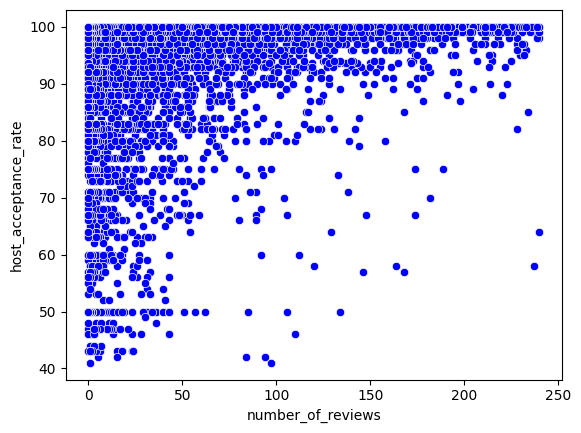

In [26]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=df6)

In [27]:
Vars_Indep= df6[['host_acceptance_rate']]
Var_Dep= df6['number_of_reviews']

model3 = LinearRegression()

model3.fit(X=Vars_Indep, y=Var_Dep)

model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.7320194]),
 'rank_': 1,
 'singular_': array([1091.89535515]),
 'intercept_': -34.21870111007777}

#### Modelo :
y = 0.7320194 * x = -34.21870111007777

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

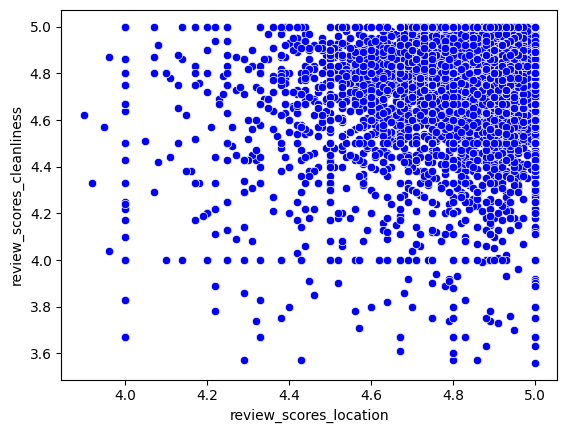

In [28]:
sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color="blue", data=df6)

In [29]:
Vars_Indep= df6[['review_scores_cleanliness']]
Var_Dep= df6['review_scores_location']

model4 = LinearRegression()

model4.fit(X=Vars_Indep, y=Var_Dep)

model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.22282816]),
 'rank_': 1,
 'singular_': array([28.97290641]),
 'intercept_': 3.8018557712098096}

#### Modelo :
y = 0.22282816 * x = 3.8018557712098096

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

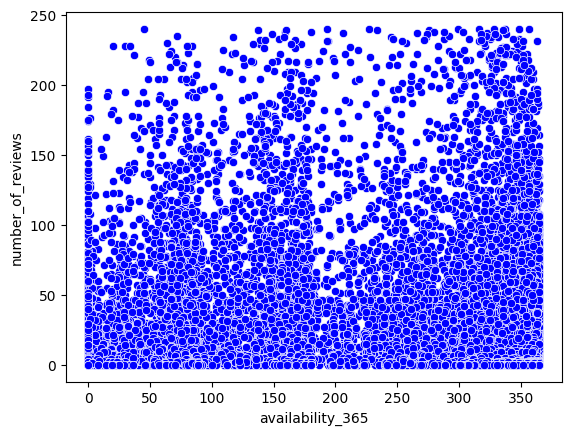

In [30]:
sns.scatterplot(x='availability_365', y='number_of_reviews', color="blue", data=df6)

In [31]:
Vars_Indep= df6[['number_of_reviews']]
Var_Dep= df6['availability_365']

model5 = LinearRegression()

model5.fit(X=Vars_Indep, y=Var_Dep)

model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.15468997]),
 'rank_': 1,
 'singular_': array([5839.63151214]),
 'intercept_': 246.31875894106878}

#### Modelo :
y = -0.15468997 * x = 246.31875894106878

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

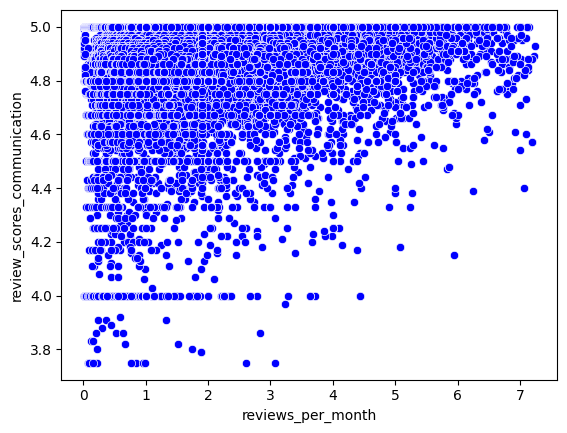

In [32]:
sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color="blue", data=df6)

In [33]:
Vars_Indep= df6[['review_scores_communication']]
Var_Dep= df6['reviews_per_month']

model6 = LinearRegression()

model6.fit(X=Vars_Indep, y=Var_Dep)

model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.1616922]),
 'rank_': 1,
 'singular_': array([24.28992691]),
 'intercept_': 0.9963229102657165}

#### Modelo :
y = 0.1616922 * x = 0.9963229102657165

#### Tablas Coeficientes

In [34]:
CF=df6.corr()

CF1 = CF.round(2)

CF1

,host_response_rate,price,host_acceptance_rate,accommodates,availability_30,availability_365,availability_60,availability_90,bedrooms,beds,...,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month
host_response_rate,1.00,-0.00,0.28,0.02,-0.03,-0.02,-0.01,-0.01,-0.00,0.02,...,0.13,0.12,0.07,0.05,0.08,0.10,0.03,0.08,0.07,0.12
price,-0.00,1.00,-0.00,0.24,0.06,0.03,0.05,0.04,0.26,0.25,...,-0.06,-0.08,0.04,0.03,0.05,0.04,0.10,0.07,0.03,-0.05
host_acceptance_rate,0.28,-0.00,1.00,0.04,-0.01,0.04,0.02,0.04,-0.02,0.02,...,0.19,0.22,0.00,-0.01,0.02,0.00,-0.01,0.01,0.01,0.22
accommodates,0.02,0.24,0.04,1.00,-0.01,0.01,0.00,0.00,0.73,0.78,...,0.05,0.05,0.02,-0.00,0.00,0.02,0.03,0.03,0.05,0.06
availability_30,-0.03,0.06,-0.01,-0.01,1.00,0.40,0.91,0.83,-0.02,-0.01,...,0.02,-0.05,-0.09,-0.07,-0.05,-0.08,-0.07,-0.09,-0.10,0.03
availability_365,-0.02,0.03,0.04,0.01,0.40,1.00,0.49,0.55,-0.00,0.01,...,0.07,0.02,-0.07,-0.07,-0.04,-0.09,-0.05,-0.08,-0.09,0.08
availability_60,-0.01,0.05,0.02,0.00,0.91,0.49,1.00,0.97,-0.02,-0.01,...,0.07,0.01,-0.08,-0.07,-0.04,-0.08,-0.07,-0.09,-0.10,0.07
availability_90,-0.01,0.04,0.04,0.00,0.83,0.55,0.97,1.00,-0.02,-0.01,...,0.10,0.04,-0.08,-0.06,-0.04,-0.07,-0.07,-0.08,-0.10,0.10
bedrooms,-0.00,0.26,-0.02,0.73,-0.02,-0.00,-0.02,-0.02,1.00,0.71,...,-0.01,-0.03,0.01,-0.00,-0.01,0.01,0.03,0.03,0.05,-0.02
beds,0.02,0.25,0.02,0.78,-0.01,0.01,-0.01,-0.01,0.71,1.00,...,0.04,0.04,0.02,0.01,0.00,0.03,0.03,0.04,0.06,0.03


In [35]:
CF2= abs(CF1)

CF2

,host_response_rate,price,host_acceptance_rate,accommodates,availability_30,availability_365,availability_60,availability_90,bedrooms,beds,...,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month
host_response_rate,1.00,0.00,0.28,0.02,0.03,0.02,0.01,0.01,0.00,0.02,...,0.13,0.12,0.07,0.05,0.08,0.10,0.03,0.08,0.07,0.12
price,0.00,1.00,0.00,0.24,0.06,0.03,0.05,0.04,0.26,0.25,...,0.06,0.08,0.04,0.03,0.05,0.04,0.10,0.07,0.03,0.05
host_acceptance_rate,0.28,0.00,1.00,0.04,0.01,0.04,0.02,0.04,0.02,0.02,...,0.19,0.22,0.00,0.01,0.02,0.00,0.01,0.01,0.01,0.22
accommodates,0.02,0.24,0.04,1.00,0.01,0.01,0.00,0.00,0.73,0.78,...,0.05,0.05,0.02,0.00,0.00,0.02,0.03,0.03,0.05,0.06
availability_30,0.03,0.06,0.01,0.01,1.00,0.40,0.91,0.83,0.02,0.01,...,0.02,0.05,0.09,0.07,0.05,0.08,0.07,0.09,0.10,0.03
availability_365,0.02,0.03,0.04,0.01,0.40,1.00,0.49,0.55,0.00,0.01,...,0.07,0.02,0.07,0.07,0.04,0.09,0.05,0.08,0.09,0.08
availability_60,0.01,0.05,0.02,0.00,0.91,0.49,1.00,0.97,0.02,0.01,...,0.07,0.01,0.08,0.07,0.04,0.08,0.07,0.09,0.10,0.07
availability_90,0.01,0.04,0.04,0.00,0.83,0.55,0.97,1.00,0.02,0.01,...,0.10,0.04,0.08,0.06,0.04,0.07,0.07,0.08,0.10,0.10
bedrooms,0.00,0.26,0.02,0.73,0.02,0.00,0.02,0.02,1.00,0.71,...,0.01,0.03,0.01,0.00,0.01,0.01,0.03,0.03,0.05,0.02
beds,0.02,0.25,0.02,0.78,0.01,0.01,0.01,0.01,0.71,1.00,...,0.04,0.04,0.02,0.01,0.00,0.03,0.03,0.04,0.06,0.03


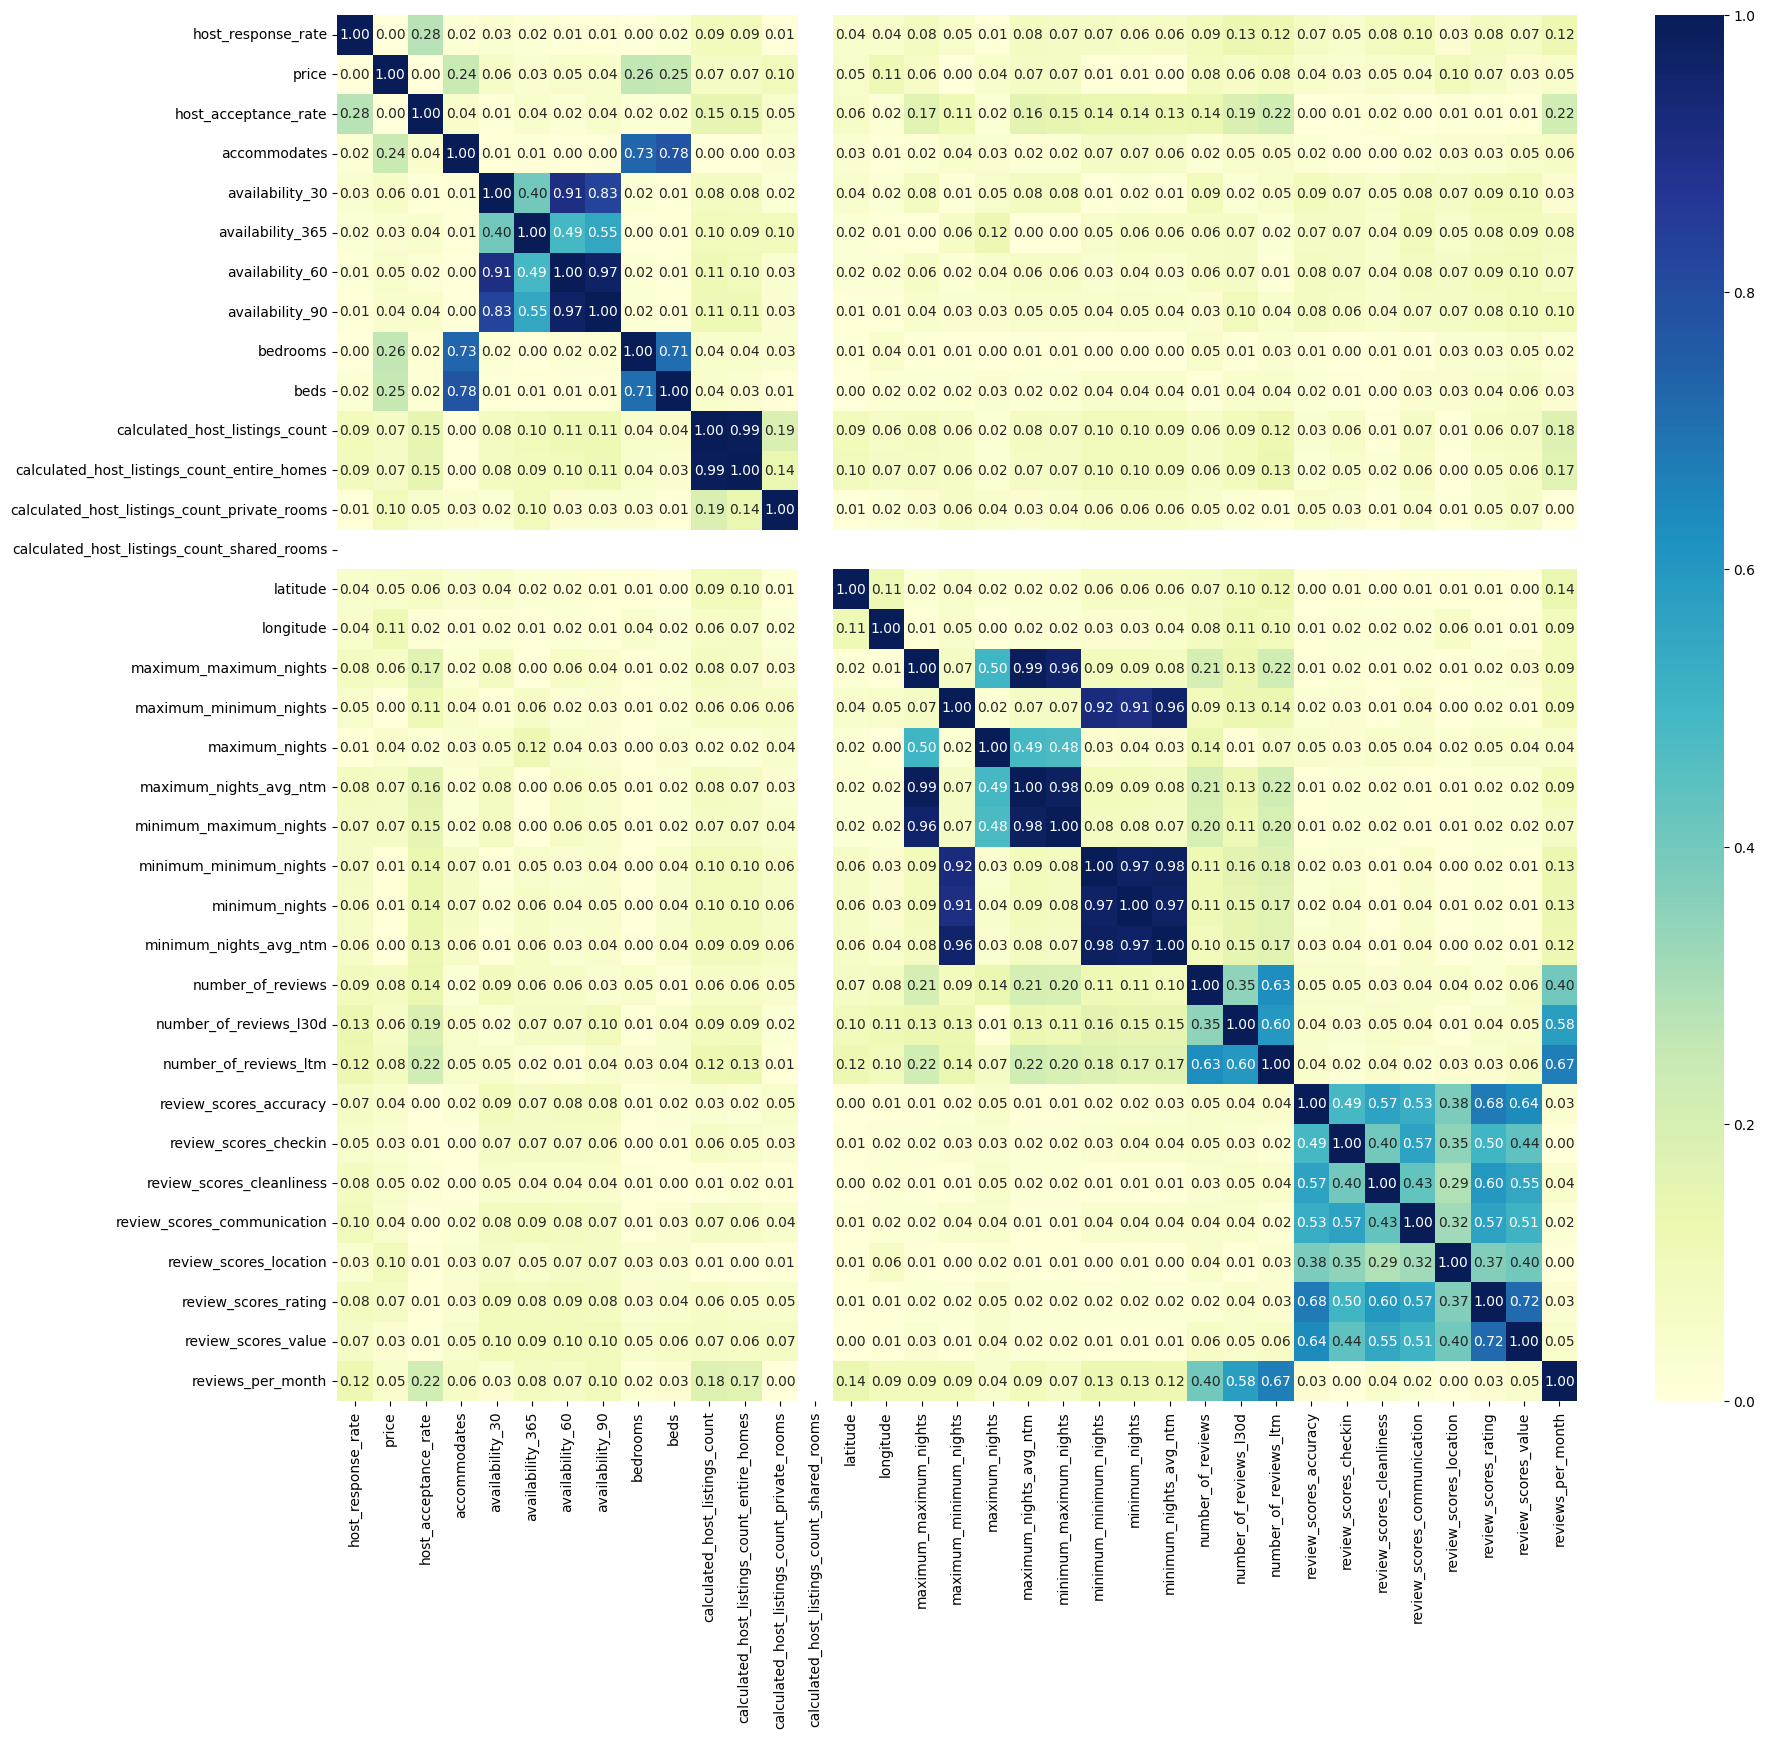

In [36]:
plt.figure(figsize=(20, 18))

Heat_Map = sns.heatmap(CF2, cmap='YlGnBu', annot=True, fmt=".2f")

plt.show()

### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Filtrado por tipo de cuarto "room_type"
## room_type = "Hotel room"



In [37]:
df3 = df2[df2['room_type'] == 'Hotel room']
df3

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
14,737328,https://www.airbnb.com/rooms/737328,20230329041210,2023-03-29,city scrape,Business Suite BEIGE near Reforma,<b>The space</b><br />On your business or leis...,We are located in the most developed area of M...,https://a0.muscache.com/pictures/10105792/ffaf...,3850198,...,5.00,4.83,4.78,NaN,t,11,7,0,0,0.18
53,865012,https://www.airbnb.com/rooms/865012,20230329041210,2023-03-29,city scrape,Business Suite RED near Reforma Av.,<b>The space</b><br />Beautiful business suite...,"The loft is in La Condesa, a neighborhood fill...",https://a0.muscache.com/pictures/12416374/df57...,3850198,...,5.00,4.97,4.97,NaN,t,11,7,0,0,0.25
55,868843,https://www.airbnb.com/rooms/868843,20230329041210,2023-03-30,city scrape,Business Suite PURPLE near Reforma,<b>The space</b><br />Beautiful business suite...,The neighborhood where we are located is one o...,https://a0.muscache.com/pictures/12479457/a401...,3850198,...,5.00,5.00,4.90,NaN,t,11,7,0,0,0.46
62,869063,https://www.airbnb.com/rooms/869063,20230329041210,2023-03-30,city scrape,Business Suite BLACK near Reforma,Beautiful business suite facing our indoor pat...,We are located in the most developed area of M...,https://a0.muscache.com/pictures/12482950/80ec...,3850198,...,5.00,4.95,4.95,NaN,t,11,7,0,0,0.25
66,281134,https://www.airbnb.com/rooms/281134,20230329041210,2023-03-30,city scrape,COOL PENT HOUSE APARTMENT @CONDESA,Amazing Pent House apartment in the heart fo C...,Quiet and safe residential neighborhood just b...,https://a0.muscache.com/pictures/5754595/e5ec9...,196253,...,5.00,5.00,4.86,NaN,t,12,3,2,0,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,43205383,https://www.airbnb.com/rooms/43205383,20230329041210,2023-03-30,city scrape,Emporio Ciudad de México,Súper departamento amueblado en la mejor zona ...,La Condesa is one of the coolest and prittest ...,https://a0.muscache.com/pictures/6c22e4d1-2294...,336118145,...,5.00,5.00,5.00,NaN,f,2,0,1,0,0.12
9537,43247503,https://www.airbnb.com/rooms/43247503,20230329041210,2023-03-30,city scrape,FlowSuites Polanco,"AnAxAgoras 41, Loft con “AlmA de HogAr”. <br ...",Ubicado en una zona con todo los servicios bás...,https://a0.muscache.com/pictures/3a86f189-ea18...,318447028,...,4.75,4.87,4.57,NaN,f,1,0,0,0,2.02
9539,43247525,https://www.airbnb.com/rooms/43247525,20230329041210,2023-03-30,previous scrape,Krystal Grand Suites Insurgentes Ciudad De México,Es un Depatartmento muy practico y funcional c...,La colonia es tranquila y tiene muchas cosas p...,https://a0.muscache.com/pictures/97db0266-3607...,318980910,...,1.00,1.00,1.00,NaN,f,1,0,0,0,0.20
9544,43247567,https://www.airbnb.com/rooms/43247567,20230329041210,2023-03-30,city scrape,CHAYA B&B,Departamento en excelente condiciones con serv...,Vecindario tranquilo y familiar con todo muy c...,https://a0.muscache.com/pictures/20760914-ba9e...,319050749,...,4.47,4.59,4.47,NaN,f,1,0,0,0,0.50


### acciones de preprocesamiento necesarias: Outliers

In [38]:
columnas_eliminadas = ['id', 'scrape_id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'neighbourhood_group_cleansed', 'bathrooms', 'license', 'calendar_updated']

columnas_numericas = df3.select_dtypes(include=np.number).columns.difference(columnas_eliminadas)

columnas_mantener = ['host_response_rate', 'price', 'host_acceptance_rate']

df4 = df3[columnas_mantener + list(columnas_numericas)]

df4

,host_response_rate,price,host_acceptance_rate,accommodates,availability_30,availability_365,availability_60,availability_90,bedrooms,beds,...,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month
14,90%,"$1,006.00",87%,2,8,340,35,65,1.0,1.0,...,0,0,4.87,5.00,4.83,5.00,4.83,4.83,4.78,0.18
53,90%,"$1,006.00",87%,2,0,332,27,57,1.0,1.0,...,0,0,4.97,5.00,4.94,5.00,4.97,4.97,4.97,0.25
55,90%,$908.00,87%,2,18,350,45,75,1.0,1.0,...,1,9,4.98,5.00,4.92,5.00,5.00,4.98,4.90,0.46
62,90%,$908.00,87%,2,24,356,54,84,1.0,1.0,...,0,3,5.00,5.00,4.95,5.00,4.95,4.95,4.95,0.25
66,100%,"$3,162.00",86%,3,29,287,40,69,1.0,2.0,...,0,0,4.71,5.00,5.00,5.00,5.00,4.71,4.86,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,100%,$0.00,100%,0,0,0,0,0,3.0,3.0,...,0,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.12
9537,100%,$0.00,100%,0,0,0,0,0,1.0,1.0,...,0,0,4.86,4.77,4.86,4.75,4.87,4.52,4.57,2.02
9539,100%,$0.00,100%,0,0,0,0,0,1.0,1.0,...,0,0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.20
9544,90%,$0.00,98%,0,0,0,0,0,1.0,2.0,...,0,0,4.59,4.53,4.53,4.47,4.59,4.29,4.47,0.50


In [39]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 14 to 11362
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            127 non-null    object 
 1   price                                         127 non-null    object 
 2   host_acceptance_rate                          127 non-null    object 
 3   accommodates                                  127 non-null    int64  
 4   availability_30                               127 non-null    int64  
 5   availability_365                              127 non-null    int64  
 6   availability_60                               127 non-null    int64  
 7   availability_90                               127 non-null    int64  
 8   bedrooms                                      127 non-null    float64
 9   beds                                          127 non-null    

In [40]:
df4['host_response_rate'] = df4['host_response_rate'].str.rstrip('%').astype(float)

df4['price'] = df4['price'].str.replace('$', '').str.replace(',', '').astype(float)

df4['host_acceptance_rate'] = df4['host_acceptance_rate'].str.rstrip('%').astype(float)

<ipython-input-40-113a22add9b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['host_response_rate'] = df4['host_response_rate'].str.rstrip('%').astype(float)
<ipython-input-40-113a22add9b8>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df4['price'] = df4['price'].str.replace('$', '').str.replace(',', '').astype(float)
<ipython-input-40-113a22add9b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [41]:
promedio_columnas = df4.mean()

df4 = df4.fillna(promedio_columnas)

y = df4

Limite_Superior= y.mean() + 3*y.std()

Limite_Inferior= y.mean() - 3*y.std()

print("Limite superior", Limite_Superior)

print("Limite inferior", Limite_Inferior)

Limite superior host_response_rate                                132.442323
price                                           19969.776275
host_acceptance_rate                              146.872922
accommodates                                       11.155473
availability_30                                    51.188564
availability_365                                  598.781777
availability_60                                   102.718298
availability_90                                   156.146119
bedrooms                                           21.182241
beds                                               21.437883
calculated_host_listings_count                     32.331445
calculated_host_listings_count_entire_homes        21.453602
calculated_host_listings_count_private_rooms       11.900840
calculated_host_listings_count_shared_rooms         3.901365
latitude                                           19.515093
longitude                                         -99.095882
maximum_

In [42]:
df5= df4[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df5

,host_response_rate,price,host_acceptance_rate,accommodates,availability_30,availability_365,availability_60,availability_90,bedrooms,beds,...,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month
14,90.0,1006.0,87.0,2.0,8,340,35,65,1.0,1.0,...,0.0,0.0,4.87,5.00,4.83,5.00,4.83,4.83,4.78,0.18
53,90.0,1006.0,87.0,2.0,0,332,27,57,1.0,1.0,...,0.0,0.0,4.97,5.00,4.94,5.00,4.97,4.97,4.97,0.25
55,90.0,908.0,87.0,2.0,18,350,45,75,1.0,1.0,...,1.0,9.0,4.98,5.00,4.92,5.00,5.00,4.98,4.90,0.46
62,90.0,908.0,87.0,2.0,24,356,54,84,1.0,1.0,...,0.0,3.0,5.00,5.00,4.95,5.00,4.95,4.95,4.95,0.25
66,100.0,3162.0,86.0,3.0,29,287,40,69,1.0,2.0,...,0.0,0.0,4.71,5.00,5.00,5.00,5.00,4.71,4.86,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,100.0,0.0,100.0,0.0,0,0,0,0,3.0,3.0,...,0.0,2.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.12
9537,100.0,0.0,100.0,0.0,0,0,0,0,1.0,1.0,...,0.0,0.0,4.86,4.77,4.86,4.75,4.87,4.52,4.57,2.02
9539,100.0,0.0,100.0,0.0,0,0,0,0,1.0,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20
9544,90.0,0.0,98.0,0.0,0,0,0,0,1.0,2.0,...,0.0,0.0,4.59,4.53,4.53,4.47,4.59,4.29,4.47,0.50


In [43]:
df5.isnull().sum()

host_response_rate                               5
price                                            1
host_acceptance_rate                             3
accommodates                                     4
availability_30                                  0
availability_365                                 0
availability_60                                  0
availability_90                                  0
bedrooms                                         2
beds                                             2
calculated_host_listings_count                   3
calculated_host_listings_count_entire_homes      4
calculated_host_listings_count_private_rooms     2
calculated_host_listings_count_shared_rooms     11
latitude                                         0
longitude                                        6
maximum_maximum_nights                           0
maximum_minimum_nights                           1
maximum_nights                                   0
maximum_nights_avg_ntm         

In [44]:
df6 = df5.copy()

df6 = df6.fillna(round(df4.mean(),1))

df6

,host_response_rate,price,host_acceptance_rate,accommodates,availability_30,availability_365,availability_60,availability_90,bedrooms,beds,...,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month
14,90.0,1006.0,87.0,2.0,8,340,35,65,1.0,1.0,...,0.0,0.0,4.87,5.00,4.83,5.00,4.83,4.83,4.78,0.18
53,90.0,1006.0,87.0,2.0,0,332,27,57,1.0,1.0,...,0.0,0.0,4.97,5.00,4.94,5.00,4.97,4.97,4.97,0.25
55,90.0,908.0,87.0,2.0,18,350,45,75,1.0,1.0,...,1.0,9.0,4.98,5.00,4.92,5.00,5.00,4.98,4.90,0.46
62,90.0,908.0,87.0,2.0,24,356,54,84,1.0,1.0,...,0.0,3.0,5.00,5.00,4.95,5.00,4.95,4.95,4.95,0.25
66,100.0,3162.0,86.0,3.0,29,287,40,69,1.0,2.0,...,0.0,0.0,4.71,5.00,5.00,5.00,5.00,4.71,4.86,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,100.0,0.0,100.0,0.0,0,0,0,0,3.0,3.0,...,0.0,2.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.12
9537,100.0,0.0,100.0,0.0,0,0,0,0,1.0,1.0,...,0.0,0.0,4.86,4.77,4.86,4.75,4.87,4.52,4.57,2.02
9539,100.0,0.0,100.0,0.0,0,0,0,0,1.0,1.0,...,0.0,0.0,4.70,4.80,4.80,4.70,4.80,4.60,4.70,0.20
9544,90.0,0.0,98.0,0.0,0,0,0,0,1.0,2.0,...,0.0,0.0,4.59,4.53,4.53,4.47,4.59,4.29,4.47,0.50


In [45]:
df6.isnull().sum()

host_response_rate                              0
price                                           0
host_acceptance_rate                            0
accommodates                                    0
availability_30                                 0
availability_365                                0
availability_60                                 0
availability_90                                 0
bedrooms                                        0
beds                                            0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
latitude                                        0
longitude                                       0
maximum_maximum_nights                          0
maximum_minimum_nights                          0
maximum_nights                                  0
maximum_nights_avg_ntm                          0


In [46]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 14 to 11362
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            122 non-null    float64
 1   price                                         126 non-null    float64
 2   host_acceptance_rate                          124 non-null    float64
 3   accommodates                                  123 non-null    float64
 4   availability_30                               127 non-null    int64  
 5   availability_365                              127 non-null    int64  
 6   availability_60                               127 non-null    int64  
 7   availability_90                               127 non-null    int64  
 8   bedrooms                                      125 non-null    float64
 9   beds                                          125 non-null    

### Analizar la correlación que existe en cada tipo de habitación (Elegir 2 tipos) respecto a las variables siguientes en el siguiente orden “(dependiente, independiente)”, utilizando Python y Google Colab, obtener los datos y gráficos requeridos en cada caso.

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

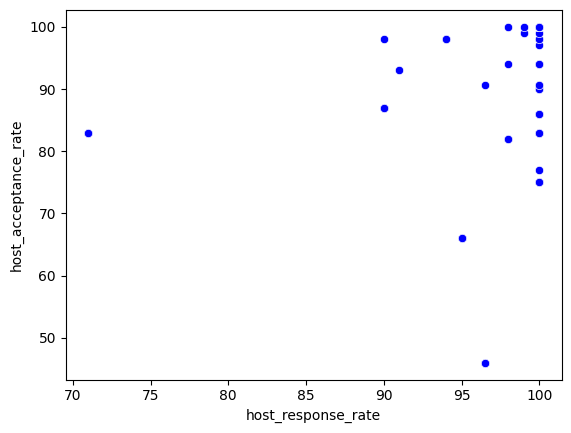

In [47]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=df6)

In [48]:
Vars_Indep= df6[['host_acceptance_rate']]
Var_Dep= df6['host_response_rate']

model= LinearRegression()

model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.11442196]),
 'rank_': 1,
 'singular_': array([137.9472888]),
 'intercept_': 87.7651539880538}

#### Modelo :
y = 0.11442196 * x = 87.765153988053

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

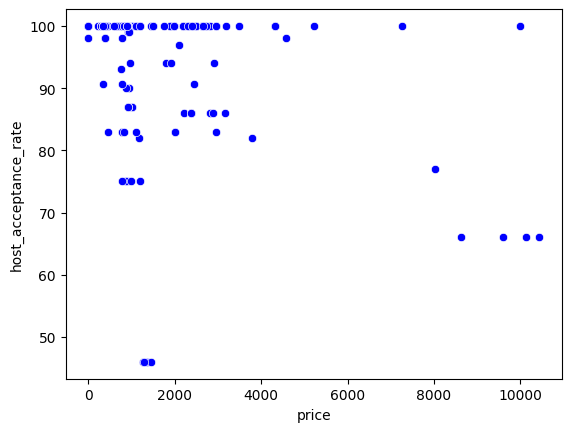

In [49]:
sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=df6)

In [50]:
Vars_Indep= df6[['host_acceptance_rate']]
Var_Dep= df6['price']

model2 = LinearRegression()

model2.fit(X=Vars_Indep, y=Var_Dep)

model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-42.25195181]),
 'rank_': 1,
 'singular_': array([137.9472888]),
 'intercept_': 5895.263383818848}

#### Modelo :
y = -42.25195181 * x = 5895.263383818848

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

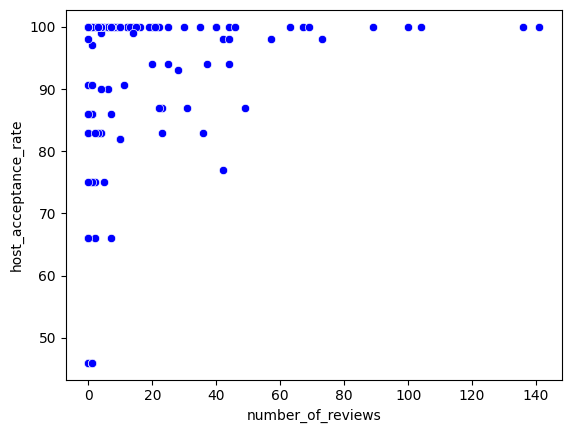

In [51]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=df6)

In [52]:
Vars_Indep= df6[['host_acceptance_rate']]
Var_Dep= df6['number_of_reviews']

model3 = LinearRegression()

model3.fit(X=Vars_Indep, y=Var_Dep)

model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.45056802]),
 'rank_': 1,
 'singular_': array([137.9472888]),
 'intercept_': -25.25986951881209}

#### Modelo :
y = 0.45056802 * x = -25.25986951881209

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

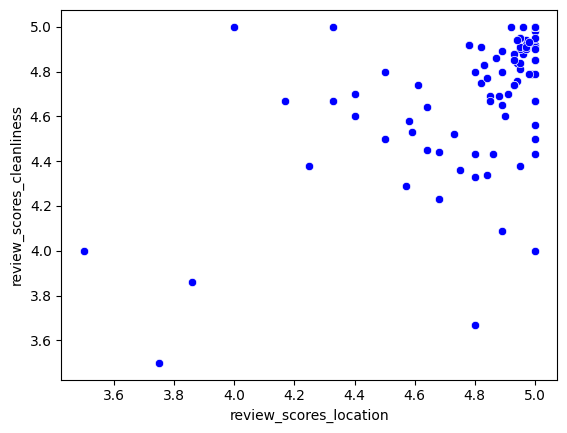

In [53]:
sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color="blue", data=df6)

In [54]:
Vars_Indep= df6[['review_scores_cleanliness']]
Var_Dep= df6['review_scores_location']

model4 = LinearRegression()

model4.fit(X=Vars_Indep, y=Var_Dep)

model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.53464774]),
 'rank_': 1,
 'singular_': array([3.28448344]),
 'intercept_': 2.29849934739827}

#### Modelo :
y = 0.53464774 * x = 2.29849934739827

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

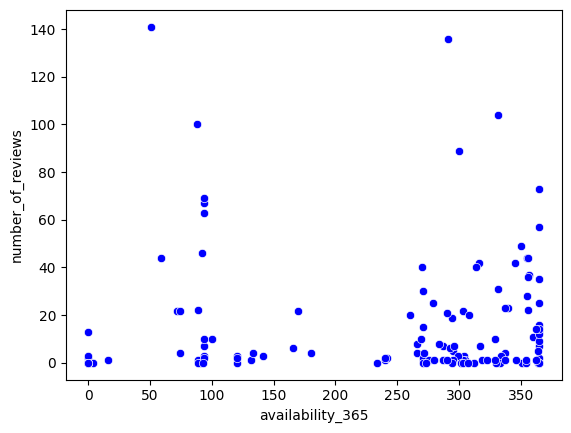

In [55]:
sns.scatterplot(x='availability_365', y='number_of_reviews', color="blue", data=df6)

In [56]:
Vars_Indep= df6[['number_of_reviews']]
Var_Dep= df6['availability_365']

model5 = LinearRegression()

model5.fit(X=Vars_Indep, y=Var_Dep)

model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.02826443]),
 'rank_': 1,
 'singular_': array([295.17878634]),
 'intercept_': 246.9243691032168}

#### Modelo :
y = -0.02826443 * x = 246.9243691032168

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

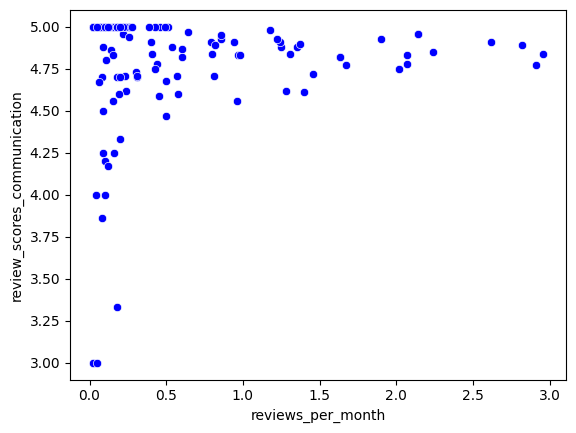

In [57]:
sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color="blue", data=df6)

In [58]:
Vars_Indep= df6[['review_scores_communication']]
Var_Dep= df6['reviews_per_month']

model6 = LinearRegression()

model6.fit(X=Vars_Indep, y=Var_Dep)

model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.162248]),
 'rank_': 1,
 'singular_': array([3.9307722]),
 'intercept_': -0.2203881610369034}

#### Modelo :
y = 0.162248 * x = -0.2203881610369034

#### Tablas Coeficientes

In [59]:
CF=df6.corr()

CF1 = CF.round(2)

CF1

,host_response_rate,price,host_acceptance_rate,accommodates,availability_30,availability_365,availability_60,availability_90,bedrooms,beds,...,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month
host_response_rate,1.00,-0.02,0.29,-0.16,0.18,-0.20,0.07,0.01,-0.08,-0.24,...,0.05,0.05,0.16,0.05,0.22,-0.01,0.20,0.17,0.18,-0.01
price,-0.02,1.00,-0.25,0.22,0.12,0.30,0.12,0.13,0.46,0.45,...,-0.15,-0.20,0.10,0.11,0.13,0.09,0.07,0.13,0.08,-0.11
host_acceptance_rate,0.29,-0.25,1.00,-0.16,-0.00,-0.27,-0.01,-0.01,-0.26,-0.30,...,0.15,0.19,-0.03,-0.10,-0.06,-0.05,-0.02,-0.00,-0.03,0.05
accommodates,-0.16,0.22,-0.16,1.00,-0.27,0.16,-0.18,-0.15,0.07,0.30,...,-0.11,-0.18,-0.06,-0.11,0.03,-0.02,-0.13,-0.06,-0.12,-0.21
availability_30,0.18,0.12,-0.00,-0.27,1.00,0.35,0.94,0.89,0.12,0.00,...,0.04,0.15,-0.15,0.06,-0.15,0.11,-0.03,-0.08,-0.15,-0.02
availability_365,-0.20,0.30,-0.27,0.16,0.35,1.00,0.46,0.53,0.10,0.09,...,-0.01,0.09,-0.00,0.11,0.06,0.21,0.04,0.08,0.04,-0.14
availability_60,0.07,0.12,-0.01,-0.18,0.94,0.46,1.00,0.98,0.10,0.01,...,0.06,0.17,-0.14,0.08,-0.19,0.13,-0.05,-0.06,-0.13,-0.00
availability_90,0.01,0.13,-0.01,-0.15,0.89,0.53,0.98,1.00,0.09,0.01,...,0.06,0.18,-0.10,0.09,-0.17,0.16,-0.04,-0.02,-0.09,0.00
bedrooms,-0.08,0.46,-0.26,0.07,0.12,0.10,0.10,0.09,1.00,0.93,...,-0.05,-0.07,0.08,0.06,0.08,0.06,0.05,0.08,0.08,-0.02
beds,-0.24,0.45,-0.30,0.30,0.00,0.09,0.01,0.01,0.93,1.00,...,-0.08,-0.10,0.04,0.03,0.01,0.08,-0.01,0.05,0.03,-0.08


In [60]:
CF2= abs(CF1)

CF2

,host_response_rate,price,host_acceptance_rate,accommodates,availability_30,availability_365,availability_60,availability_90,bedrooms,beds,...,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month
host_response_rate,1.00,0.02,0.29,0.16,0.18,0.20,0.07,0.01,0.08,0.24,...,0.05,0.05,0.16,0.05,0.22,0.01,0.20,0.17,0.18,0.01
price,0.02,1.00,0.25,0.22,0.12,0.30,0.12,0.13,0.46,0.45,...,0.15,0.20,0.10,0.11,0.13,0.09,0.07,0.13,0.08,0.11
host_acceptance_rate,0.29,0.25,1.00,0.16,0.00,0.27,0.01,0.01,0.26,0.30,...,0.15,0.19,0.03,0.10,0.06,0.05,0.02,0.00,0.03,0.05
accommodates,0.16,0.22,0.16,1.00,0.27,0.16,0.18,0.15,0.07,0.30,...,0.11,0.18,0.06,0.11,0.03,0.02,0.13,0.06,0.12,0.21
availability_30,0.18,0.12,0.00,0.27,1.00,0.35,0.94,0.89,0.12,0.00,...,0.04,0.15,0.15,0.06,0.15,0.11,0.03,0.08,0.15,0.02
availability_365,0.20,0.30,0.27,0.16,0.35,1.00,0.46,0.53,0.10,0.09,...,0.01,0.09,0.00,0.11,0.06,0.21,0.04,0.08,0.04,0.14
availability_60,0.07,0.12,0.01,0.18,0.94,0.46,1.00,0.98,0.10,0.01,...,0.06,0.17,0.14,0.08,0.19,0.13,0.05,0.06,0.13,0.00
availability_90,0.01,0.13,0.01,0.15,0.89,0.53,0.98,1.00,0.09,0.01,...,0.06,0.18,0.10,0.09,0.17,0.16,0.04,0.02,0.09,0.00
bedrooms,0.08,0.46,0.26,0.07,0.12,0.10,0.10,0.09,1.00,0.93,...,0.05,0.07,0.08,0.06,0.08,0.06,0.05,0.08,0.08,0.02
beds,0.24,0.45,0.30,0.30,0.00,0.09,0.01,0.01,0.93,1.00,...,0.08,0.10,0.04,0.03,0.01,0.08,0.01,0.05,0.03,0.08


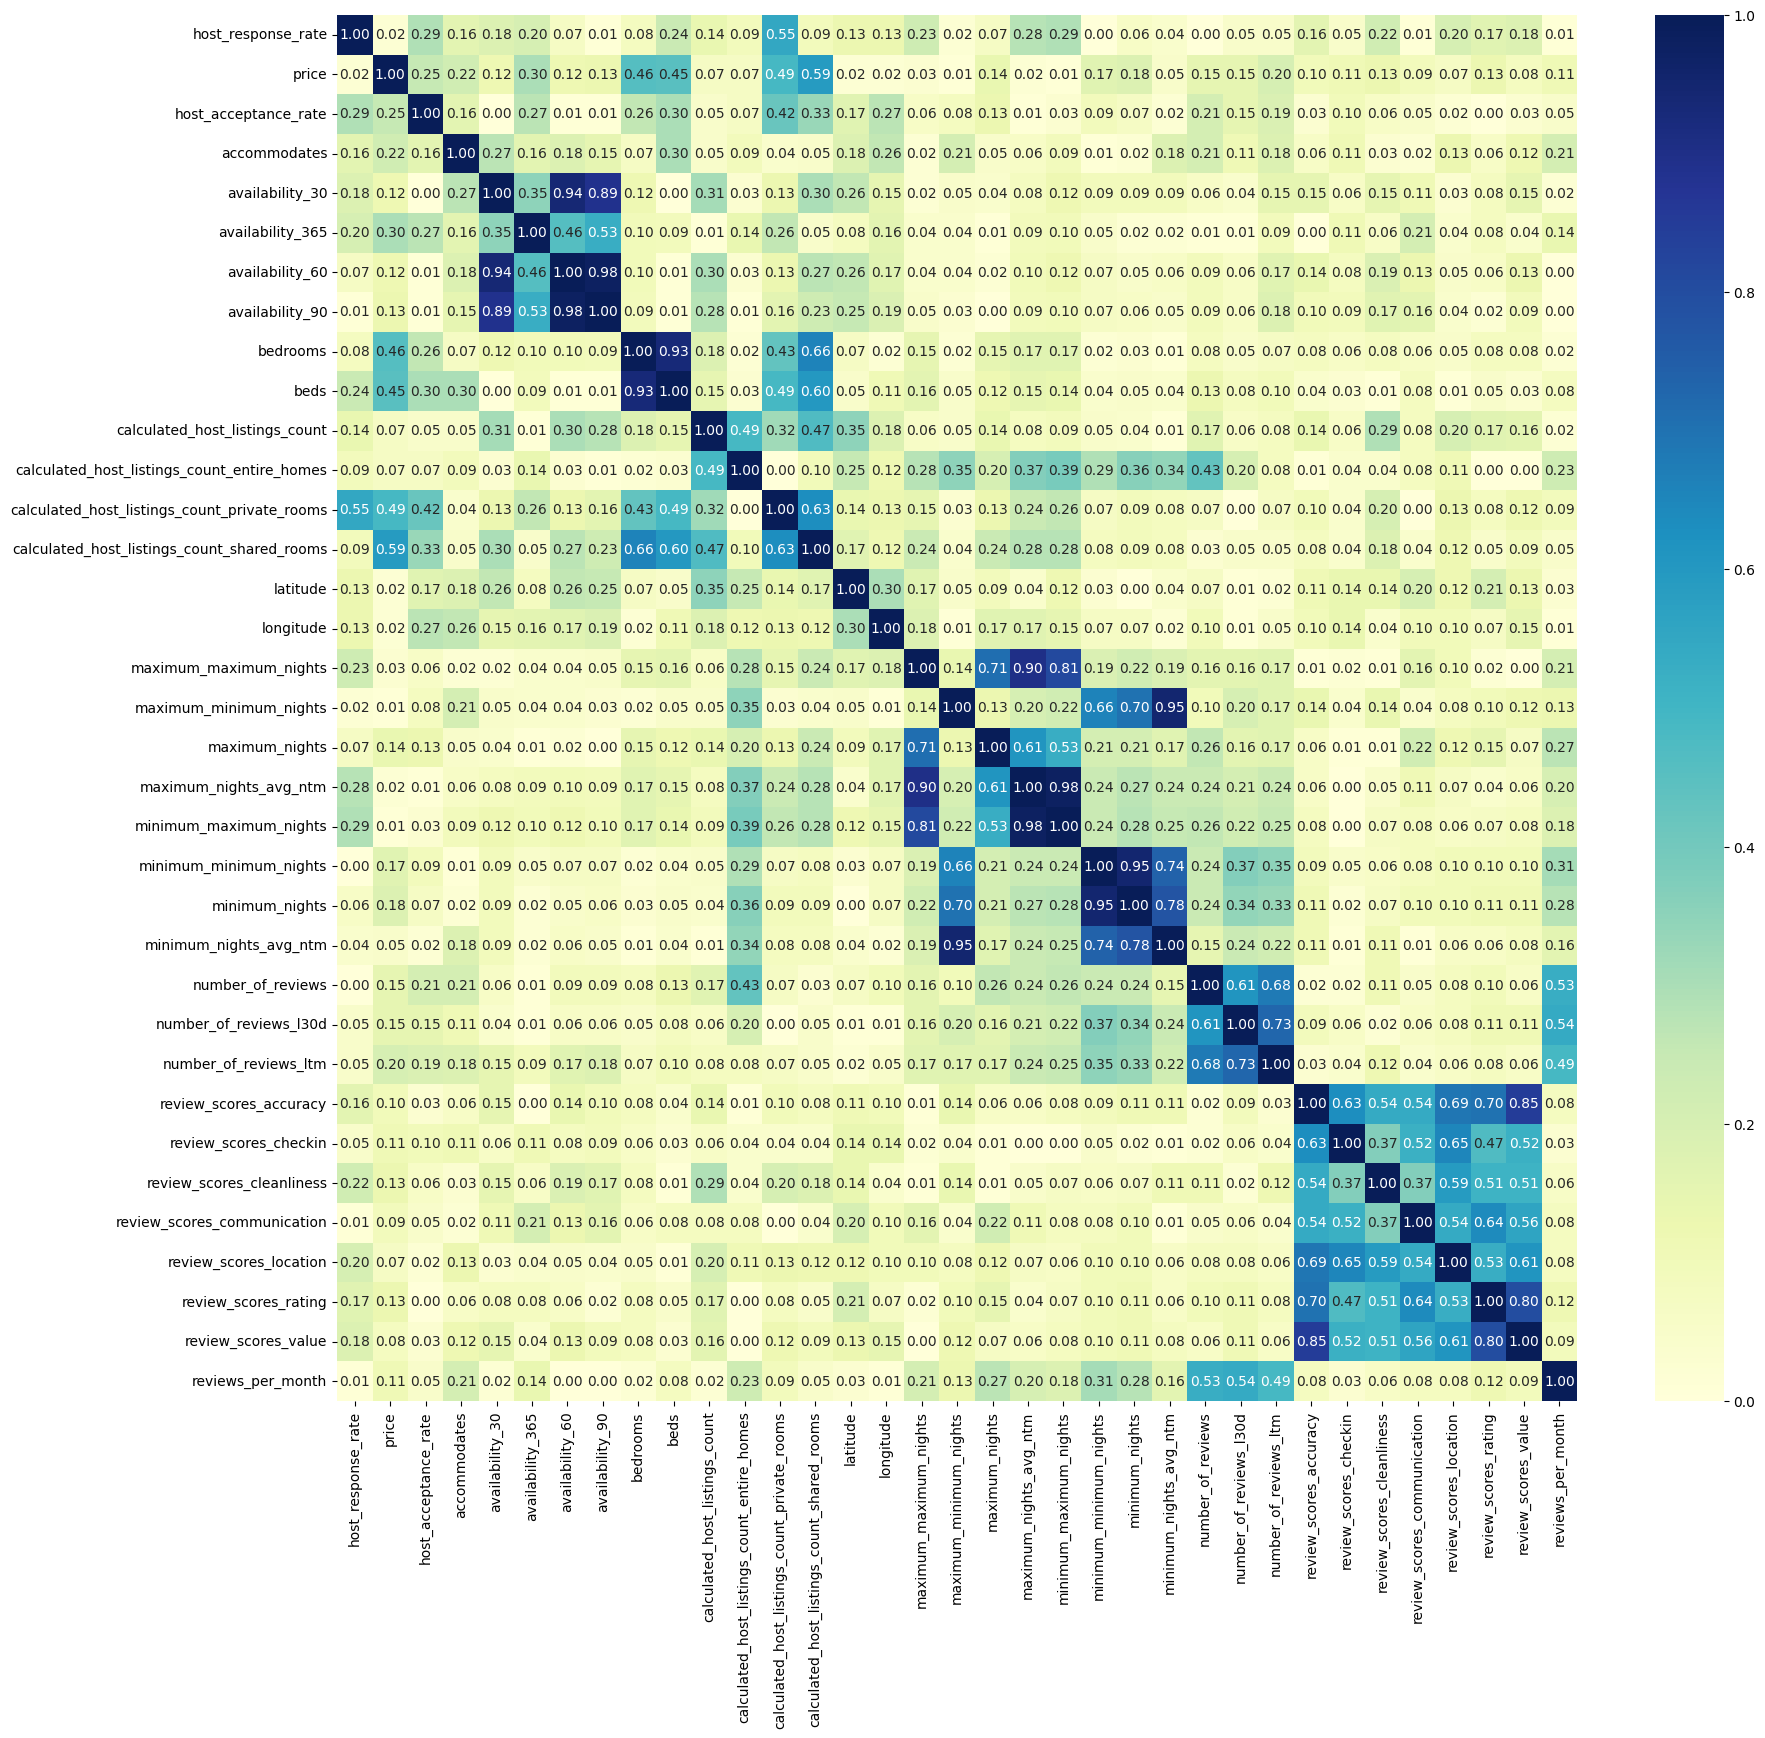

In [61]:
plt.figure(figsize=(20, 18))

Heat_Map = sns.heatmap(CF2, cmap='YlGnBu', annot=True, fmt=".2f")

plt.show()

In [63]:
df6.to_excel('HOTEL_ROOM.xlsx')
df7.to_excel('Entire_home_apt.xlsx')